#***ARIMA***

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/BNB.csv')

#8:2

In [16]:
# Chỉ lấy cột giá đóng cửa
prices = data['Close'].values

# Phân chia dữ liệu theo tỉ lệ 8:2
train_size = int(len(prices) * 0.8)
test_size = int(len(prices) * 0.2)

train, test = prices[:train_size], prices[train_size:train_size+test_size]

print(f'train: {train_size}')
print(f'test: {test_size}')

# Xây dựng và huấn luyện mô hình ARIMA
model = ARIMA(train, order=(5, 1, 0))  # Cấu hình order có thể được điều chỉnh dựa trên dữ liệu
model_fit = model.fit()

# Dự đoán trên tập test
test_predict = model_fit.forecast(steps=len(test))

train: 1523
test: 380


In [17]:
# Đánh giá mô hình
mse = mean_squared_error(test, test_predict)
mae = mean_absolute_error(test, test_predict)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - test_predict) / test)) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

MAE: 105.11413238302995
RMSE: 129.32197818941555
MAPE: 33.03357609634268


30-day predictions: [330.90608545334186, 331.80489752797286, 331.6589435060882, 329.931213559245, 331.32235225488097, 330.72731251263474, 330.68385973973614, 330.74236925572404, 330.9121689462706, 330.7158539649062, 330.83229309035175, 330.8189363680567, 330.8105845489951, 330.7964193324161, 330.82172413981345, 330.80226210441435, 330.80744022963194, 330.8078668725731, 330.80879811956476, 330.8058084515833, 330.8087369410749, 330.80754317927176, 330.8076826933761, 330.80763581221476, 330.80796022515125, 330.80755462585506, 330.80777863664144, 330.80772161950324, 330.807727050718, 330.8076943526787]
60-day predictions: [330.90608545334186, 331.80489752797286, 331.6589435060882, 329.931213559245, 331.32235225488097, 330.72731251263474, 330.68385973973614, 330.74236925572404, 330.9121689462706, 330.7158539649062, 330.83229309035175, 330.8189363680567, 330.8105845489951, 330.7964193324161, 330.82172413981345, 330.80226210441435, 330.80744022963194, 330.8078668725731, 330.80879811956476, 33

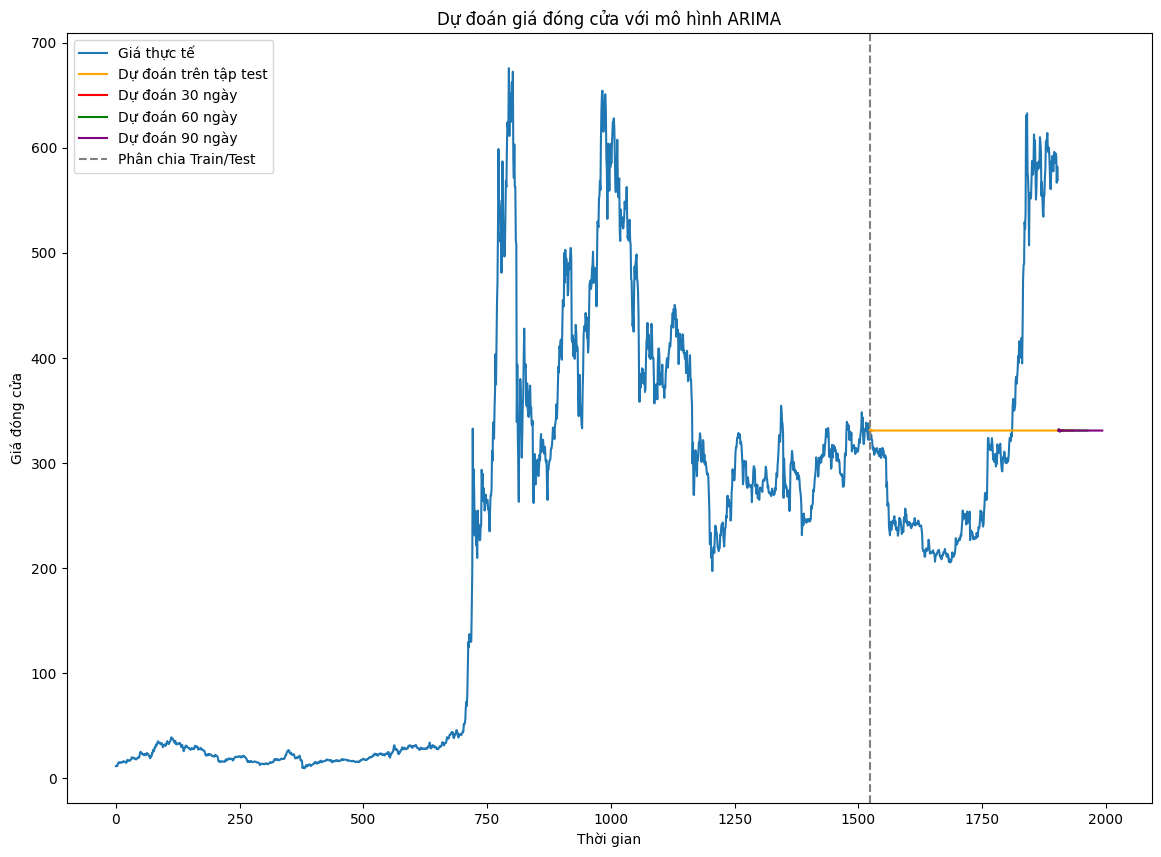

In [18]:
# Dự đoán tương lai
def predict_future_arima(model_fit, steps):
    future_predict = model_fit.get_forecast(steps=steps)
    future_pred_mean = future_predict.predicted_mean
    return future_pred_mean

# Dự đoán 30, 60, và 90 ngày
pred_30 = predict_future_arima(model_fit, 30)
pred_60 = predict_future_arima(model_fit, 60)
pred_90 = predict_future_arima(model_fit, 90)

# In ra kết quả dự đoán từng ngày cho 30, 60, và 90 ngày
print("30-day predictions:", pred_30.tolist())
print("60-day predictions:", pred_60.tolist())
print("90-day predictions:", pred_90.tolist())

# Vẽ biểu đồ kết quả
plt.figure(figsize=(14, 10))
plt.plot(prices, label='Giá thực tế')
plt.plot(np.arange(len(train), len(train) + len(test)), test_predict, label='Dự đoán trên tập test', color='orange')
plt.plot(np.arange(len(prices), len(prices) + 30), pred_30, label='Dự đoán 30 ngày', color='red')
plt.plot(np.arange(len(prices), len(prices) + 60), pred_60, label='Dự đoán 60 ngày', color='green')
plt.plot(np.arange(len(prices), len(prices) + 90), pred_90, label='Dự đoán 90 ngày', color='purple')
plt.axvline(x=len(train), color='gray', linestyle='--', label='Phân chia Train/Test')
plt.legend()
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa')
plt.title('Dự đoán giá đóng cửa với mô hình ARIMA')
plt.show()


#7:3

In [20]:
# Chỉ lấy cột giá đóng cửa
prices = data['Close'].values

# Phân chia dữ liệu theo tỉ lệ 7:3
train_size = int(len(prices) * 0.7)
test_size = int(len(prices) * 0.3)

train, test = prices[:train_size], prices[train_size:train_size+test_size]

print(f'train: {train_size}')
print(f'test: {test_size}')

# Xây dựng và huấn luyện mô hình ARIMA
model = ARIMA(train, order=(5, 1, 0))  # Cấu hình order có thể được điều chỉnh dựa trên dữ liệu
model_fit = model.fit()

# Dự đoán trên tập test
test_predict = model_fit.forecast(steps=len(test))

train: 1332
test: 571


In [21]:
# Đánh giá mô hình
mse = mean_squared_error(test, test_predict)
mae = mean_absolute_error(test, test_predict)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - test_predict) / test)) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

MAE: 72.61098474475183
RMSE: 115.27709393848319
MAPE: 19.27308412390788


30-day predictions: [270.58476617443074, 270.80570833898486, 271.15858688065964, 271.04624714098054, 271.0537542656287, 271.0549110330011, 271.021710927496, 270.98213679735795, 270.9984110411003, 270.9894585350495, 270.9890655790684, 270.9933915625471, 270.9971816528838, 270.99498197048536, 270.9970282251312, 270.9968929286288, 270.99642178397846, 270.9961299852562, 270.9963996220437, 270.9960493956561, 270.99611408470724, 270.9961499437647, 270.9961644962282, 270.9961351025835, 270.9961867289568, 270.99617042562375, 270.9961708002478, 270.9961708990947, 270.9961736929543, 270.9961668489466]
60-day predictions: [270.58476617443074, 270.80570833898486, 271.15858688065964, 271.04624714098054, 271.0537542656287, 271.0549110330011, 271.021710927496, 270.98213679735795, 270.9984110411003, 270.9894585350495, 270.9890655790684, 270.9933915625471, 270.9971816528838, 270.99498197048536, 270.9970282251312, 270.9968929286288, 270.99642178397846, 270.9961299852562, 270.9963996220437, 270.996049395

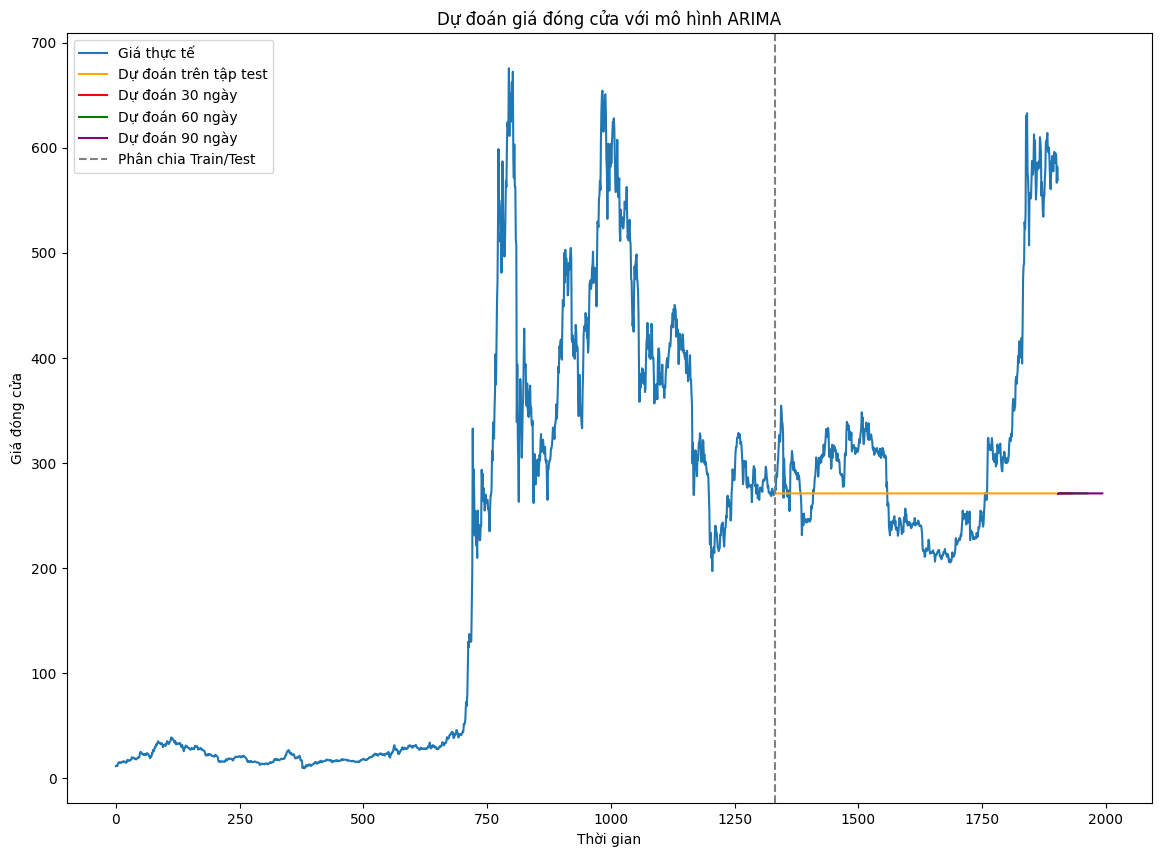

In [22]:
# Dự đoán tương lai
def predict_future_arima(model_fit, steps):
    future_predict = model_fit.get_forecast(steps=steps)
    future_pred_mean = future_predict.predicted_mean
    return future_pred_mean

# Dự đoán 30, 60, và 90 ngày
pred_30 = predict_future_arima(model_fit, 30)
pred_60 = predict_future_arima(model_fit, 60)
pred_90 = predict_future_arima(model_fit, 90)

# In ra kết quả dự đoán từng ngày cho 30, 60, và 90 ngày
print("30-day predictions:", pred_30.tolist())
print("60-day predictions:", pred_60.tolist())
print("90-day predictions:", pred_90.tolist())

# Vẽ biểu đồ kết quả
plt.figure(figsize=(14, 10))
plt.plot(prices, label='Giá thực tế')
plt.plot(np.arange(len(train), len(train) + len(test)), test_predict, label='Dự đoán trên tập test', color='orange')
plt.plot(np.arange(len(prices), len(prices) + 30), pred_30, label='Dự đoán 30 ngày', color='red')
plt.plot(np.arange(len(prices), len(prices) + 60), pred_60, label='Dự đoán 60 ngày', color='green')
plt.plot(np.arange(len(prices), len(prices) + 90), pred_90, label='Dự đoán 90 ngày', color='purple')
plt.axvline(x=len(train), color='gray', linestyle='--', label='Phân chia Train/Test')
plt.legend()
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa')
plt.title('Dự đoán giá đóng cửa với mô hình ARIMA')
plt.show()


#6:4

In [23]:
# Chỉ lấy cột giá đóng cửa
prices = data['Close'].values

# Phân chia dữ liệu theo tỉ lệ 6:2:2
train_size = int(len(prices) * 0.6)
test_size = int(len(prices) * 0.4)

train, test = prices[:train_size], prices[train_size:train_size+test_size]

print(f'train: {train_size}')
print(f'test: {test_size}')

# Xây dựng và huấn luyện mô hình ARIMA
model = ARIMA(train, order=(5, 1, 0))  # Cấu hình order có thể được điều chỉnh dựa trên dữ liệu
model_fit = model.fit()

# Dự đoán trên tập test
test_predict = model_fit.forecast(steps=len(test))

train: 1142
test: 761


In [24]:
# Đánh giá mô hình
mse = mean_squared_error(test, test_predict)
mae = mean_absolute_error(test, test_predict)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - test_predict) / test)) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

MAE: 138.02738255273172
RMSE: 145.51442329694072
MAPE: 50.155561174144324


30-day predictions: [420.34937722377055, 417.0957529844855, 416.64111948963904, 417.78446903924333, 417.06146661782327, 416.77857254672136, 417.2562377664809, 417.19334099400993, 417.0628903522951, 417.1995191353396, 417.2093834981151, 417.14697044572273, 417.172155440211, 417.183125785992, 417.1616238605596, 417.1650464510725, 417.17206424039426, 417.16675967223404, 417.16657545426654, 417.1695102627371, 417.1683780631111, 417.16777287734504, 417.1686563303998, 417.168471386385, 417.16812811767494, 417.1683603552861, 417.168378601017, 417.16825343279066, 417.1683075920958, 417.16833921628955]
60-day predictions: [420.34937722377055, 417.0957529844855, 416.64111948963904, 417.78446903924333, 417.06146661782327, 416.77857254672136, 417.2562377664809, 417.19334099400993, 417.0628903522951, 417.1995191353396, 417.2093834981151, 417.14697044572273, 417.172155440211, 417.183125785992, 417.1616238605596, 417.1650464510725, 417.17206424039426, 417.16675967223404, 417.16657545426654, 417.16951

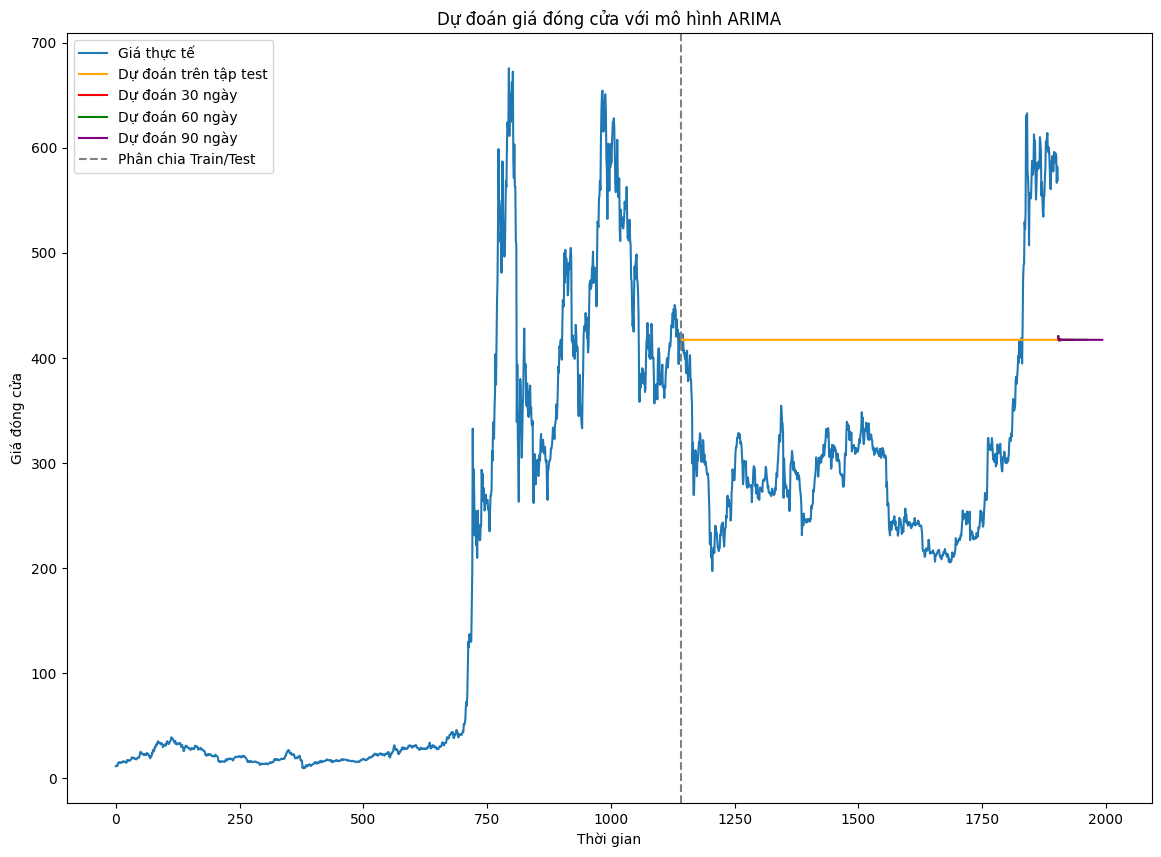

In [25]:
# Dự đoán tương lai
def predict_future_arima(model_fit, steps):
    future_predict = model_fit.get_forecast(steps=steps)
    future_pred_mean = future_predict.predicted_mean
    return future_pred_mean

# Dự đoán 30, 60, và 90 ngày
pred_30 = predict_future_arima(model_fit, 30)
pred_60 = predict_future_arima(model_fit, 60)
pred_90 = predict_future_arima(model_fit, 90)

# In ra kết quả dự đoán từng ngày cho 30, 60, và 90 ngày
print("30-day predictions:", pred_30.tolist())
print("60-day predictions:", pred_60.tolist())
print("90-day predictions:", pred_90.tolist())

# Vẽ biểu đồ kết quả
plt.figure(figsize=(14, 10))
plt.plot(prices, label='Giá thực tế')
plt.plot(np.arange(len(train), len(train) + len(test)), test_predict, label='Dự đoán trên tập test', color='orange')
plt.plot(np.arange(len(prices), len(prices) + 30), pred_30, label='Dự đoán 30 ngày', color='red')
plt.plot(np.arange(len(prices), len(prices) + 60), pred_60, label='Dự đoán 60 ngày', color='green')
plt.plot(np.arange(len(prices), len(prices) + 90), pred_90, label='Dự đoán 90 ngày', color='purple')
plt.axvline(x=len(train), color='gray', linestyle='--', label='Phân chia Train/Test')
plt.legend()
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa')
plt.title('Dự đoán giá đóng cửa với mô hình ARIMA')
plt.show()
